In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#filtra per nodo, per working days e per bhca
node=input('only one node [i.e. cscfbe01|CSCFBE02|CSCFEH01|CSCFEH02|CSCFLD01|CSCFLD02|CSCFMS02|CSCFMS03] >>> ')
# MMMYYYY=input('insert period for the graph title [i.e. Feb-Apr 2021] >>> ')
buffer=pd.read_excel('C:\\Users\\ccarbon\\OneDrive - Vodafone Group\\JOBFolder\\CSCF_Dashboard\\UK\\UK_Forecast\\UK_CSCF_Forecast_Mar21-.xlsx')
buffer['weekday']=buffer['day'].dt.weekday
buffer['att/reg']=buffer['bhca']/buffer['Reg']
buffer=buffer[(buffer['weekday']!=6) & (buffer['weekday']!=5)]
buffer=buffer[buffer['CSCF']==node]
startdate=input('Startdate [i.e. 2021-03-18]')
stopdate=input('Stopdate [i.e. 2021-07-31]')
buffer=buffer[buffer['day']>=startdate]
buffer=buffer[buffer['day']<=stopdate]
idx = buffer.groupby(['date'])['bhca'].transform(max) == buffer['bhca']
# buffer[idx]
# buffer[idx].to_excel(r'CSCF_Forecast\\' +node+ '.xlsx', index=False)

only one node [i.e. cscfbe01|CSCFBE02|CSCFEH01|CSCFEH02|CSCFLD01|CSCFLD02|CSCFMS02|CSCFMS03] >>> CSCFLD01
Startdate [i.e. 2021-03-18]2021-03-18
Stopdate [i.e. 2021-07-31]2021-07-31


mean number of session attempts per user for CSCFLD01 = 0.7
median of session attempts per user for CSCFLD01 = 0.7


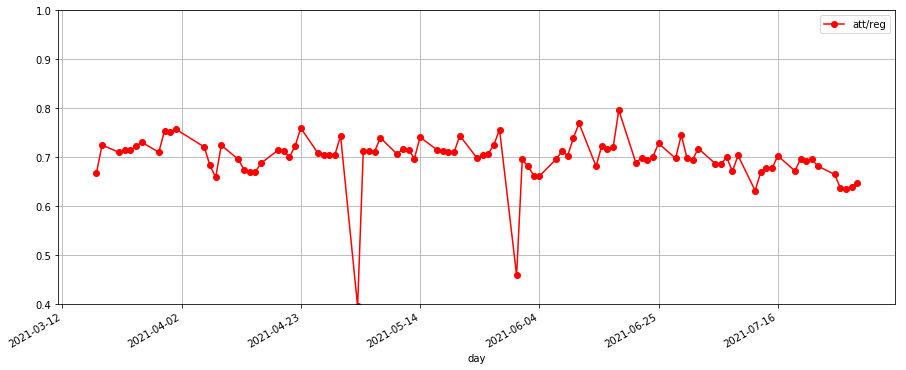

In [4]:
cb_plot = buffer[idx]
cb_plot.plot('day', 'att/reg', figsize=(15,6), ylim=(0.4,1), grid=True, color='red', marker='o')

import statistics
cb_plot_array = np.array(cb_plot['att/reg'])
avg=(statistics.mean(cb_plot_array))
avg_prtn=round(avg, 2)
median=(statistics.median(cb_plot_array))
median_prtn=round(median, 2)
print ('mean number of session attempts per user for %s =' %node, avg_prtn)
print ('median of session attempts per user for %s =' %node, median_prtn)

In [5]:
# scegli quale delle due righe subito qui sotto deve essere attiva per includere o meno la rimozione delgli outliers effettuata 
# dalla cella subito precedente a questa. Se attivi la prima linea e disattivi la seconda, abiliti la rimozione degli outliers 
# su bhca e, viceversa, se disattivi la prima e attivi la seconda, escludi la rimozione degli outliers

# df = np.array(buffer_post_clndup)
df = np.array(buffer[idx])

dfx_bhca= df[:, np.newaxis, 4]
dfx_reg=  df[:, np.newaxis, 3]
dfy= df[:, np.newaxis, 5]

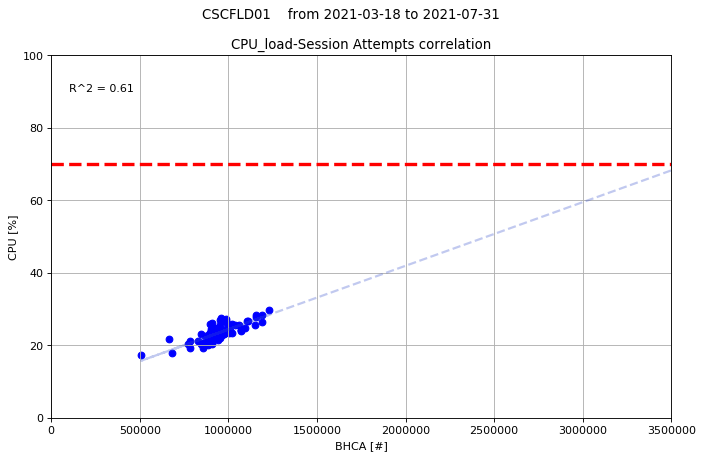

In [6]:
plt.figure(figsize=(10, 6), dpi=80)
plt.xlabel('BHCA [#]')
plt.ylabel('CPU [%]')
plt.xlim(0, 3.5E6)
plt.ylim(0, 100)
plt.suptitle(node+'    '+'from '+startdate+' to '+stopdate)
plt.title('CPU_load-Session Attempts correlation')
plt.grid()

# plot the scatter graph
plt.scatter(dfx_bhca, dfy, color="blue")
plt.axhline(70, color="red", linestyle='dashed', linewidth = 3)

from math import sqrt
regressor = LinearRegression()
regressor.fit(dfx_bhca, dfy)
W1=regressor.coef_
b=regressor.intercept_
# print('Coef(W1) - slope/weight:',regressor.coef_)
# print('Intercept(W0/b) - bias/intercept:',regressor.intercept_)
# print('R^2 = %.2f' % regressor.score(dfx_bhca, dfy))

dfx_bhca_extension_for_tl=3500000
dfx_bhca_tl = np.vstack((dfx_bhca, dfx_bhca_extension_for_tl))

dfx_bhca=dfx_bhca.astype(float)
dfy_bhca=dfx_bhca.astype(float)

z = np.polyfit(dfx_bhca.flatten(), dfy.flatten(), 1)
plt.text(100000, 90, 'R^2 = %0.2f' % regressor.score(dfx_bhca, dfy))
# disegna la trendline
plt.plot(dfx_bhca_tl,W1*dfx_bhca_tl+b, 'r--', lw=2, color=[0.2, 0.3, 0.8, 0.3])


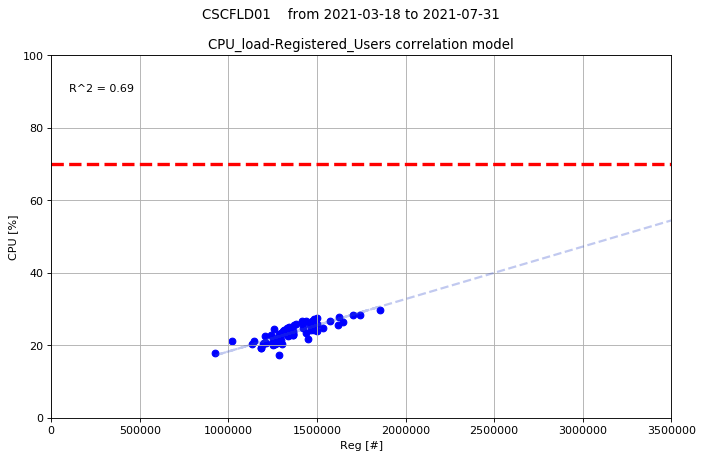

In [7]:
plt.figure(figsize=(10, 6), dpi=80)
plt.xlabel('Reg [#]')
plt.ylabel('CPU [%]')
plt.xlim(0, 3.5E6)
plt.ylim(0, 100)
plt.suptitle(node+'    '+'from '+startdate+' to '+stopdate)
plt.title('CPU_load-Registered_Users correlation model')
plt.grid()
plt.scatter(dfx_reg, dfy, color="blue")
plt.axhline(70, color="red", linestyle='dashed', linewidth = 3)

regressor.fit(dfx_reg, dfy)
W2=regressor.coef_
b2=regressor.intercept_
# print('Coef(W1) - slope/weight:',regressor.coef_)
# print('Intercept(W0/b) - bias/intercept:',regressor.intercept_)
# print('R^2 = %.2f' % regressor.score(dfx_reg, dfy))

dfx_reg_extension_for_tl=3500000
dfx_reg_tl = np.vstack((dfx_reg, dfx_reg_extension_for_tl))

dfx_reg=dfx_reg.astype(float)
dfy_reg=dfx_reg.astype(float)

z = np.polyfit(dfx_reg.flatten(), dfy.flatten(), 1)
plt.text(100000, 90, 'R^2 = %0.2f' % regressor.score(dfx_reg, dfy))
# disegna la trendline
plt.plot(dfx_reg_tl,W2*dfx_reg_tl+b2, 'r--', lw=2, color=[0.2, 0.3, 0.8, 0.3])


In [19]:
bias=float(b)
slope=float(W1)
print('Bias = ', bias)
print('Slope= ', slope)
CPU_thr=float(input('\nInsert your CPU load threshold [only number]>>'))
Forecast_bhca=int((CPU_thr-bias)/slope)
Forecast_reg=int(Forecast_bhca/median)
print('\n\nForecasted bhca = ', Forecast_bhca)
print('Forecasted subs = ', Forecast_reg)

Bias =  6.841871989231755
Slope=  1.75479121930426e-05

Insert your CPU load threshold [only number]>>70


Forecasted bhca =  3599181
Forecasted subs =  5113899
